In [115]:
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
train_df = pd.read_parquet('train.parquet')
train_df.head()

,brand,primaryCategories,reviews.numHelpful,reviews.rating,reviews.text
0,2,Health & Beauty,NaN,5,Amazon's batteries are great. I've had no prob...
1,2,Health & Beauty,NaN,5,always need batteries
2,0,Electronics,0.0,4,It's pretty good for what it is designed to do...
3,0,Electronics,0.0,4,I love it it comes with a 12 month kids subscr...
4,0,Electronics,0.0,4,"For the price, it is quite a nice tablet. I mu..."


In [90]:
train_df.shape

(6000, 5)

In [91]:
test_df = pd.read_parquet('test.parquet')
test_df.head()


,brand,primaryCategories,reviews.numHelpful,reviews.rating,reviews.text
0,2,Health & Beauty,NaN,4,A lot of battery for the buck.
1,0,Electronics,0.0,4,Great tablet for toddlers. Easy yet fun. I pur...
2,2,Health & Beauty,NaN,1,I love Amazon and Amazon products but....MAJOR...
3,2,Health & Beauty,NaN,5,Fast delivery of product as advertised.
4,2,Health & Beauty,NaN,4,"Battery life is equivalent to name-brand, mid-..."


In [92]:
test_df.shape

(2000, 5)

## Exploration

In [93]:
train_df.columns

Index(['brand', 'primaryCategories', 'reviews.numHelpful', 'reviews.rating',
       'reviews.text'],
      dtype='object')

In [94]:
train_df.dtypes

brand                   int64
primaryCategories      object
reviews.numHelpful    float64
reviews.rating          int64
reviews.text           object
dtype: object

In [95]:

train_df.isna().sum()

brand                    0
primaryCategories        0
reviews.numHelpful    3356
reviews.rating           0
reviews.text             0
dtype: int64

In [96]:
test_df.columns

Index(['brand', 'primaryCategories', 'reviews.numHelpful', 'reviews.rating',
       'reviews.text'],
      dtype='object')

In [97]:
test_df.dtypes

brand                   int64
primaryCategories      object
reviews.numHelpful    float64
reviews.rating          int64
reviews.text           object
dtype: object

In [98]:
train_df.isna().sum()

brand                    0
primaryCategories        0
reviews.numHelpful    3356
reviews.rating           0
reviews.text             0
dtype: int64

## Visualization

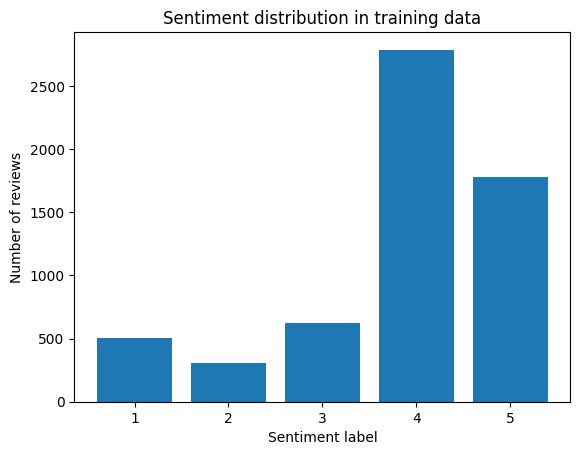

In [116]:
# Count occurrences of each sentiment label
sentiment_counts = train_df['reviews.rating'].value_counts()

# Plot distribution as a bar chart
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel("Sentiment label")
plt.ylabel("Number of reviews")
plt.title("Sentiment distribution in training data")
plt.show()

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [100]:
# Handle missing values, fill with average
train_df['reviews.numHelpful'].fillna(train_df['reviews.numHelpful'].mean(), inplace=True)

In [101]:
import re

In [102]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [103]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [104]:
# Text cleaning and preprocessing
def clean_text(text):
    text = text.lower()
    text = re.sub('[^a-z]+', ' ', text)
    text = ' '.join(word for word in text.split() if word not in stop)
    return text

train_df['cleaned_reviews'] = train_df['reviews.text'].apply(clean_text)
test_df['cleaned_reviews'] = test_df['reviews.text'].apply(clean_text)

In [119]:
# Visualize the most common words
from collections import Counter
cnt = Counter()
for text in train_df['cleaned_reviews'].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(20)

[('batteries', 2010),
 ('great', 1646),
 ('good', 1516),
 ('tablet', 1266),
 ('price', 1129),
 ('amazon', 829),
 ('use', 826),
 ('last', 639),
 ('like', 613),
 ('long', 584),
 ('work', 558),
 ('bought', 539),
 ('one', 537),
 ('battery', 527),
 ('would', 510),
 ('buy', 495),
 ('well', 491),
 ('time', 484),
 ('product', 480),
 ('kids', 441)]

In [120]:
# Visualize the least common words
cnt.most_common()[:-20:-1]

[('construction', 1),
 ('buckle', 1),
 ('pit', 1),
 ('eta', 1),
 ('disposing', 1),
 ('abnormal', 1),
 ('ceiling', 1),
 ('project', 1),
 ('damn', 1),
 ('alerting', 1),
 ('goodreads', 1),
 ('integrates', 1),
 ('workout', 1),
 ('treadmill', 1),
 ('gym', 1),
 ('meantime', 1),
 ('intention', 1),
 ('leappads', 1),
 ('wrone', 1)]

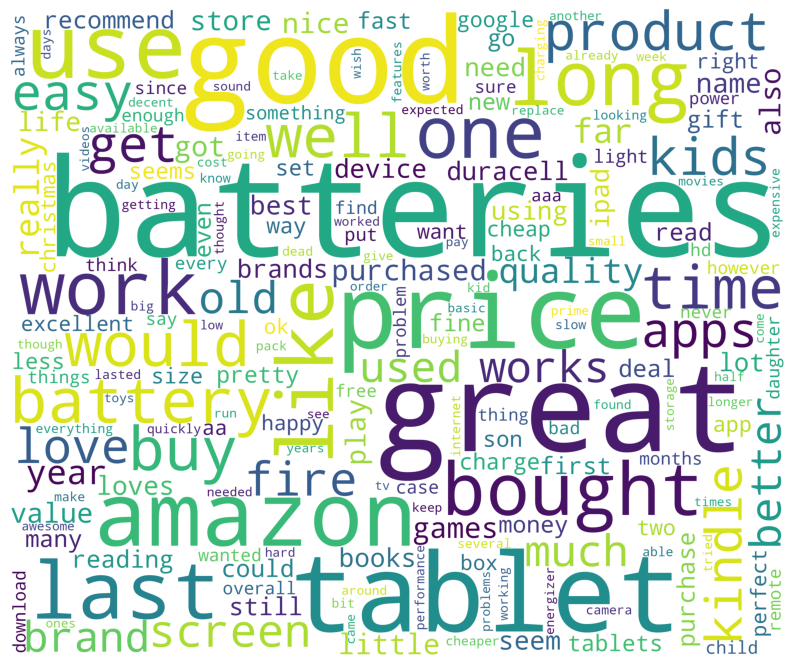

In [121]:
# wordcloud visualization
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=3000, height=2500).generate_from_frequencies(cnt)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [105]:
# Feature extraction
vectorizer = TfidfVectorizer()
train_features = vectorizer.fit_transform(train_df['cleaned_reviews'])
test_features = vectorizer.transform(test_df['cleaned_reviews'])

In [106]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(train_features, train_df['reviews.rating'], test_size=0.2, random_state=42)

In [111]:
# Model training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [112]:
# Prediction on test data
y_pred = model.predict(X_test)

In [113]:
# Calculate accuracy score
accuracy_score(y_test, y_pred)

0.6833333333333333

In [114]:
# Prediction on test data
test_pred = model.predict(test_features)

In [122]:
# making the model perform better
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.001, 0.01, 0.1, 1, 10]}
clf = GridSearchCV(model, parameters, cv=5, verbose=0, n_jobs=-1)
clf.fit(X_train, y_train)

clf.best_params_

clf.best_score_

# Prediction on test data
y_pred = clf.predict(X_test)

# Calculate accuracy score
accuracy_score(y_test, y_pred) # 0.68

0.6975

0.7 is better than previous